In [1]:
import torch


In [5]:
import pandas as pd
df=pd.read_csv("/beegfs/desy/user/kaechben/fix_mask_scan3/summary.csv")
df

,path_index,autoreg,context_features,network_layers,network_layers_nf,network_nodes_nf,batch_size,coupling_layers,lr,batchnorm,...,val_mmd,val_cov,val_w1m,val_w1efp,val_w1p,step,time,initgen,bullshitbingo,bullshitbingo2
0,/beegfs/desy/user/kaechben/fix_mask_scan3/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,...,0.071391,0.568,0.006302,0.000113,0.001631,91929.0,16656.437284,NaN,NaN,NaN
1,/beegfs/desy/user/kaechben/fix_mask_scan3/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,...,0.074087,0.576,0.002633,0.000038,0.001195,311242.0,58981.220936,False,NaN,NaN
2,/beegfs/desy/user/kaechben/fix_mask_scan3/ligh...,False,0.0,3.0,2.0,256.0,3096.0,15.0,0.001,False,...,0.110534,0.365,0.026221,0.001302,0.035257,5600.0,1866.745228,True,False,NaN
3,/beegfs/desy/user/kaechben/fix_mask_scan3/ligh...,False,0.0,3.0,2.0,256.0,3096.0,15.0,0.001,False,...,0.069841,0.569,0.011278,0.000224,0.002795,31191.0,18662.397346,True,False,NaN
4,/beegfs/desy/user/kaechben/fix_mask_scan3/ligh...,False,0.0,3.0,2.0,256.0,3096.0,15.0,0.001,False,...,0.068939,0.590,0.009716,0.000187,0.002954,29242.0,15125.713788,True,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,/beegfs/desy/user/kaechben/fix_mask_scan3/ligh...,False,0.0,3.0,2.0,256.0,2048.0,15.0,0.001,False,...,0.077728,0.476,0.012152,0.000234,0.002566,23686.0,8809.343497,True,True,False
68,/beegfs/desy/user/kaechben/fix_mask_scan3/ligh...,False,0.0,3.0,2.0,256.0,2048.0,15.0,0.001,False,...,0.069584,0.582,0.008194,0.000154,0.002015,24286.0,8284.136274,True,True,True
69,/beegfs/desy/user/kaechben/fix_mask_scan3/ligh...,False,0.0,3.0,2.0,256.0,3096.0,15.0,0.001,False,...,0.072132,0.539,0.009298,0.000174,0.002525,15791.0,7962.250770,True,True,False
70,/beegfs/desy/user/kaechben/fix_mask_scan3/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,...,0.071417,0.569,0.006669,0.000137,0.002170,41412.0,7518.659152,False,False,False


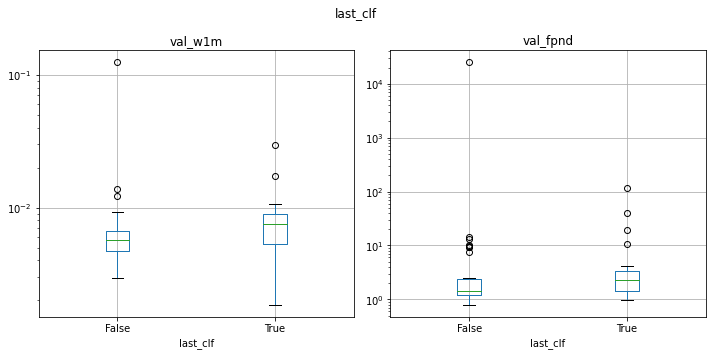

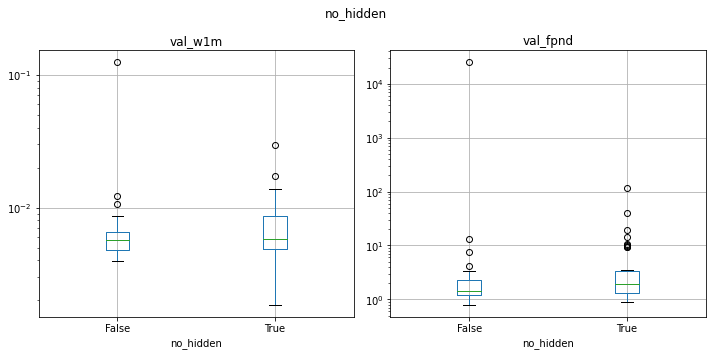

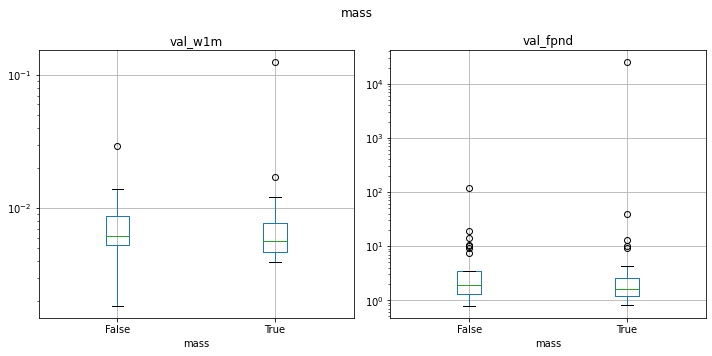

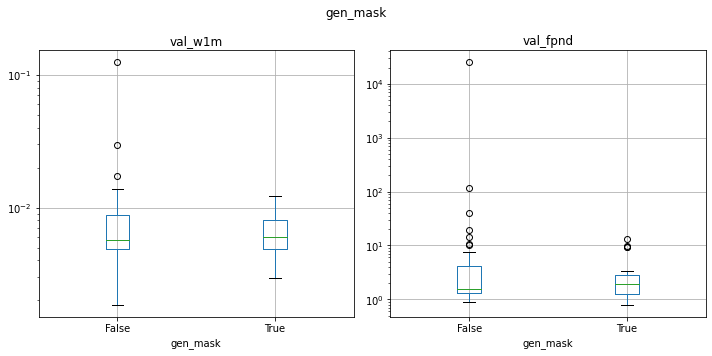

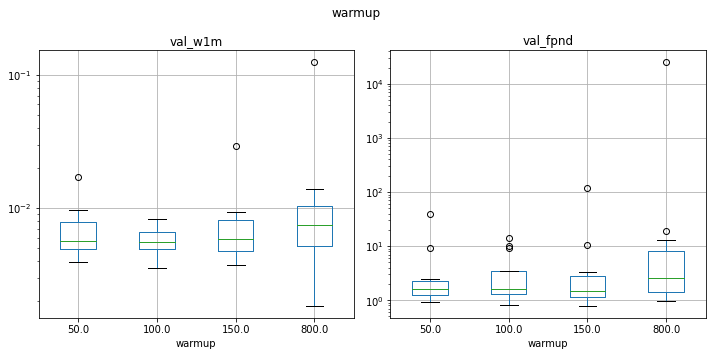

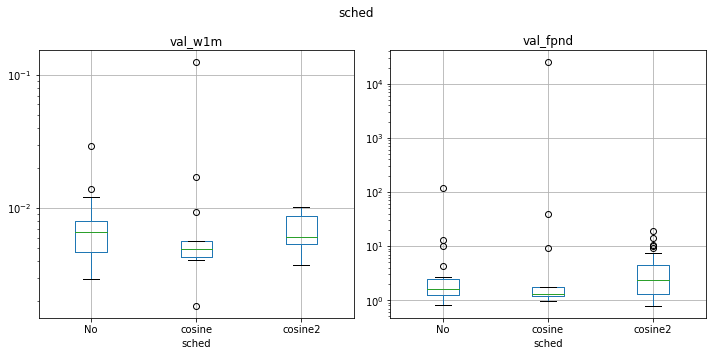

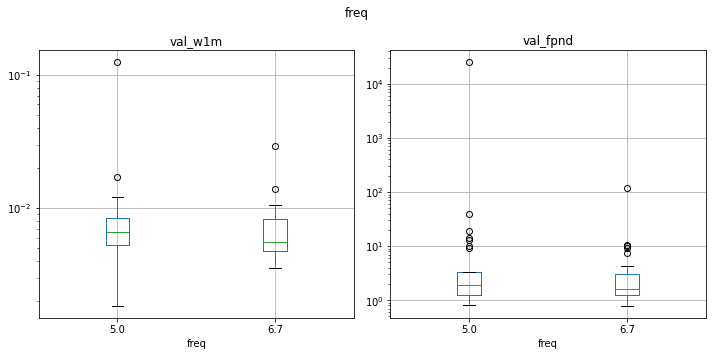

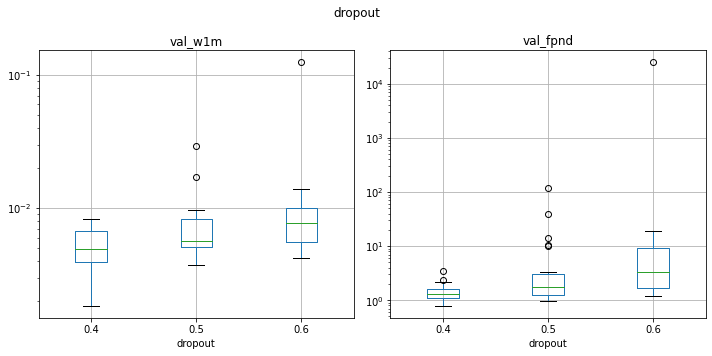

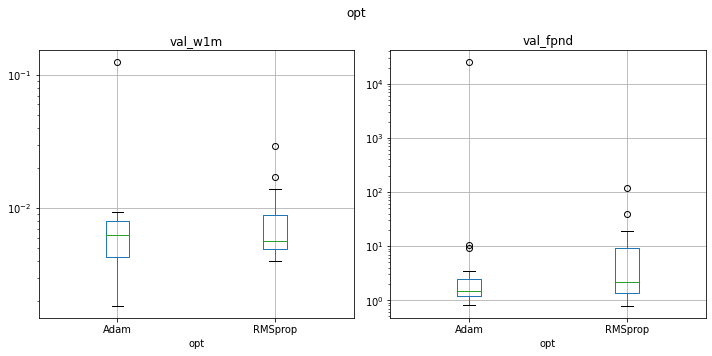

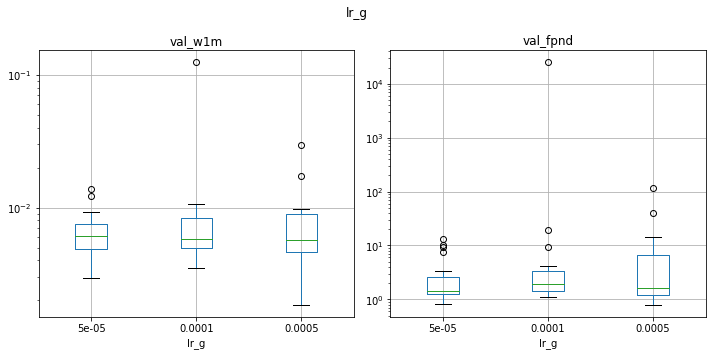

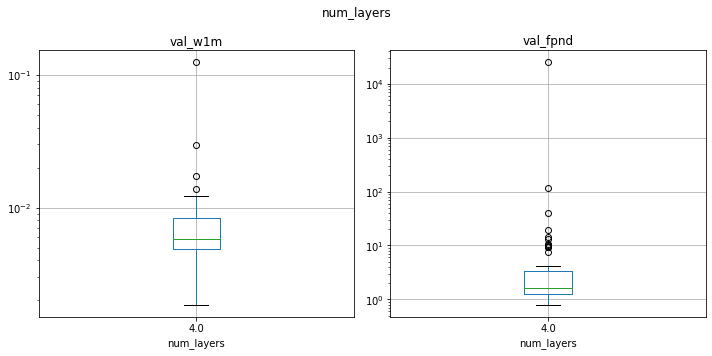

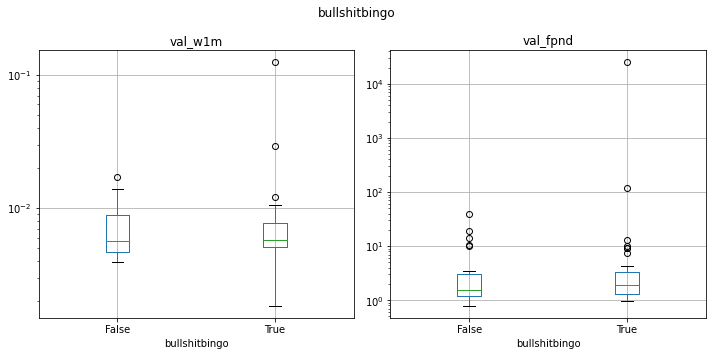

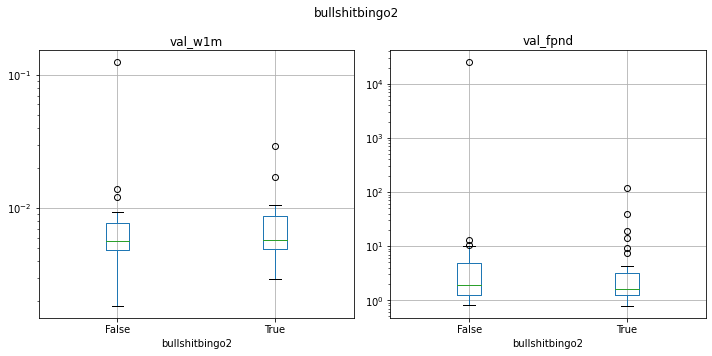

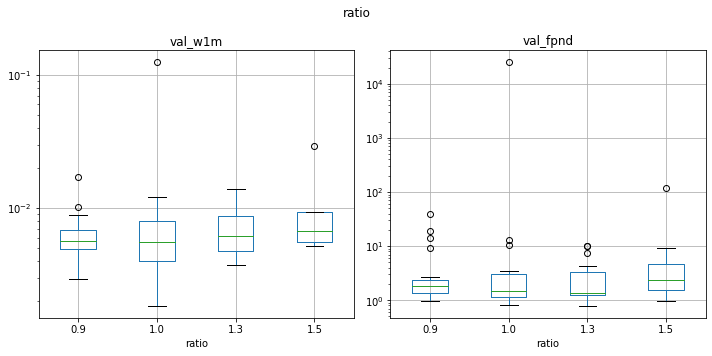

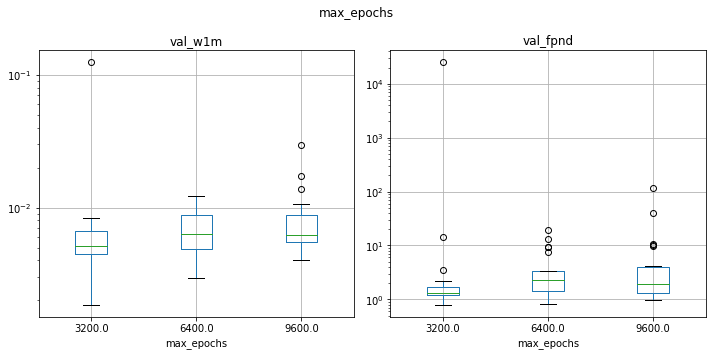

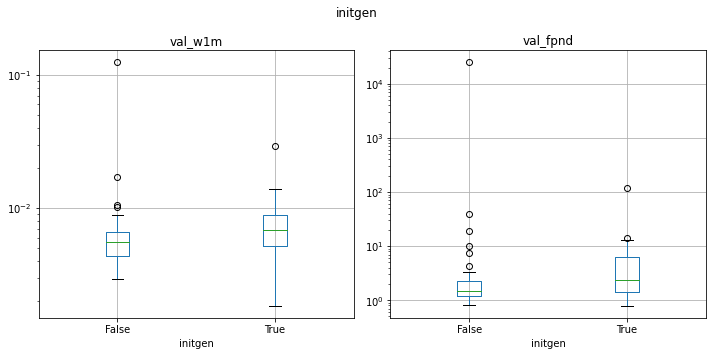

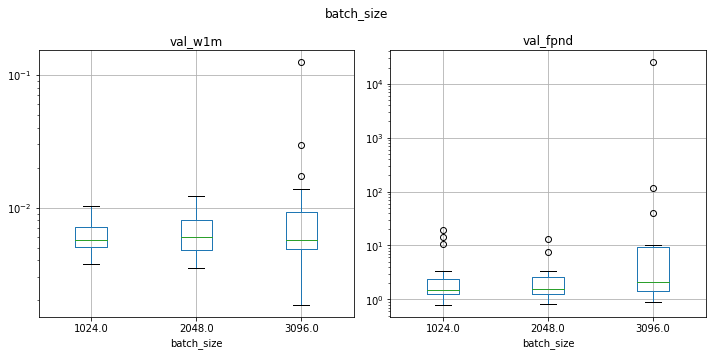

In [7]:
import matplotlib.pyplot as plt
df.loc[df["sched"]!=df["sched"],"sched"]="No"

for key in ["last_clf","no_hidden","mass","gen_mask","warmup","sched","freq","dropout","opt","lr_g","num_layers","bullshitbingo","bullshitbingo2","ratio","max_epochs","initgen","batch_size"]:
    df=df[df.lr_g!=0.01]
    df=df[df[key]==df[key]]
#     fig,ax=plt.subplots(1,2,figsize=(10,5))
    
#     ax[0].scatter(df[key].astype("category").cat.codes,df["val_w1m"],alpha=0.3)
#     ax[0].set_xticks(list(set(df[key].astype("category").cat.codes)))
#     ax[0].set_xticklabels(df[key].astype("category").cat.categories)
#     ax[1].scatter(df[key].astype("category").cat.codes,df["val_fpnd"],alpha=0.3)
#     ax[1].set_xticks(list(set(df[key].astype("category").cat.codes)))
#     ax[1].set_xticklabels(df[key].astype("category").cat.categories)
#     ax[0].set_yscale("log")
#     ax[1].set_yscale("log")
#     ax[1].set_xlabel("fpnd")
#     ax[0].set_xlabel("w1m")
#     fig.suptitle(key)
    
#     plt.show()
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    ax[1].set_xlabel(key)
    ax[0].set_xlabel(key)
    ax[1].set_xlabel("fpnd")
    ax[0].set_xlabel("w1m")
    df.boxplot("val_w1m",key,ax[0])
    df.boxplot("val_fpnd",key,ax[1])
    fig.suptitle(key)
    ax[0].set_yscale("log")
    ax[1].set_yscale("log")
    plt.tight_layout()
    plt.show()

In [37]:
list(set(df[key].astype("category").cat.codes))
list(set(df[key].astype("category").cat.categories))

[2.0, 3.0, 4.0]

In [38]:
pd.set_option('display.max_columns', 500)
df.sort_values("val_w1m",ascending=True)


,path_index,autoreg,context_features,network_layers,network_layers_nf,network_nodes_nf,batch_size,coupling_layers,lr,batchnorm,bins,tail_bound,limit,n_dim,dropout,canonical,max_steps,lambda,name,disc,variable,parton,wgan,corr,num_layers,freq,n_part,fc,hidden,heads,l_dim,lr_g,lr_d,lr_nf,sched,opt,max_epochs,mass,no_hidden,clf,val_check,frac_pretrain,seed,quantile,last_clf,gen_mask,gelu,warmup,val_logprob,val_fpnd,val_mmd,val_cov,val_w1m,val_w1efp,val_w1p,step,time,ratio
28,/beegfs/desy/user/kaechben/fix_mask_scan2/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,5.0,6.0,150000.0,3.0,0.3,False,100000.0,1.0,fix_mask_scan2,False,1.0,t,False,True,2.0,9.0,30.0,False,500.0,4.0,100.0,0.00050,0.000750,0.000722,No,AdamW,3200.0,False,False,True,50.0,80.0,69.0,False,False,False,False,800.0,0.508717,0.614276,0.073158,0.547,0.001548,0.000032,0.001473,171956.0,20372.282509,NaN
59,/beegfs/desy/user/kaechben/fix_mask_scan2/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,5.0,6.0,150000.0,3.0,0.1,False,100000.0,1.0,fix_mask_scan2,False,1.0,t,False,True,2.0,6.0,30.0,False,500.0,4.0,100.0,0.00050,0.000650,0.000722,cosine,AdamW,3200.0,False,False,True,50.0,80.0,69.0,False,False,True,False,15.0,0.517032,0.405831,0.073288,0.540,0.002398,0.000043,0.001098,146627.0,19409.157427,NaN
22,/beegfs/desy/user/kaechben/fix_mask_scan2/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,5.0,6.0,150000.0,3.0,0.5,False,100000.0,1.0,fix_mask_scan2,False,1.0,t,False,True,4.0,6.0,30.0,False,500.0,4.0,100.0,0.00010,0.000150,0.000722,No,Adam,3200.0,False,True,True,50.0,80.0,69.0,False,True,False,False,800.0,0.512745,1.143026,0.075347,0.544,0.002521,0.000055,0.001641,88547.0,23880.203300,NaN
35,/beegfs/desy/user/kaechben/fix_mask_scan2/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,5.0,6.0,150000.0,3.0,0.3,False,100000.0,1.0,fix_mask_scan2,False,1.0,t,False,True,3.0,6.0,30.0,False,500.0,4.0,100.0,0.00010,0.000150,0.000722,No,RMSprop,3200.0,True,True,True,50.0,80.0,69.0,False,True,True,False,15.0,0.515921,1.032580,0.070259,0.555,0.003000,0.000053,0.001130,88547.0,20345.513194,NaN
60,/beegfs/desy/user/kaechben/fix_mask_scan2/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,5.0,6.0,150000.0,3.0,0.1,False,100000.0,1.0,fix_mask_scan2,False,1.0,t,False,True,4.0,6.0,30.0,False,500.0,4.0,100.0,0.00050,0.000500,0.000722,No,AdamW,3200.0,False,True,True,50.0,80.0,69.0,False,True,True,False,15.0,0.513619,0.660521,0.072892,0.562,0.003140,0.000056,0.002214,52247.0,14103.081019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,/beegfs/desy/user/kaechben/fix_mask_scan2/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,5.0,6.0,150000.0,3.0,0.5,False,100000.0,1.0,fix_mask_scan2,False,1.0,t,False,True,2.0,6.0,30.0,False,500.0,4.0,100.0,0.00050,0.000650,0.000722,cosine,Adam,3200.0,False,False,True,50.0,80.0,69.0,False,True,True,False,800.0,0.510226,10.300306,0.072414,0.538,0.011252,0.000190,0.004135,15947.0,2601.908223,NaN
9,/beegfs/desy/user/kaechben/fix_mask_scan2/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,5.0,6.0,150000.0,3.0,0.5,False,100000.0,1.0,fix_mask_scan2,False,1.0,t,False,True,2.0,9.0,30.0,False,500.0,4.0,100.0,0.00010,0.000150,0.000722,cosine2,AdamW,3200.0,False,True,True,50.0,80.0,69.0,False,True,False,False,50.0,0.513501,5.825179,0.070533,0.577,0.011315,0.000220,0.003493,151537.0,24048.974318,NaN
64,/beegfs/desy/user/kaechben/fix_mask_scan2/ligh...,False,0.0,3.0,2.0,256.0,1024.0,15.0,0.001,False,5.0,6.0,150000.0,3.0,0.1,False,100000.0,1.0,fix_mask_scan2,False,1.0,t,False,True,4.0,9.0,30.0,False,500.0,4.0,100.0,0.00010,0.000090,0.000722,cosine2,RMSprop,3200.0,True,True,True,50.0,80.0,69.0,False,True,False,NaN,800.0,0.512707,8.955920,0.070382,0.557,0.011943,0.000214,0.004587,29024.0,7520.063900,0.9
52,/beegfs/desy/user/kaechben/fix_ma

In [17]:
import seaborn as sns
sns.stripplot(df["sched"],df["val_fpnd"])

ModuleNotFoundError: No module named 'seaborn'